In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.compat.v1 as tf
import sys
plt.style.use('siads')

%matplotlib inline

## Input parameters for this JupyterNotebook

In [2]:
ntestw = 1642-832

PLOT_ALL = False

SENSOR_LIST=[1,2,3,4,5,6,7,8,9,10,20,50,100,200,300,400,500,600]


In [3]:
train_mse_pod_qdeim = []
test_mse_pod_qdeim = []
for N_SENSOR in SENSOR_LIST:
    print(N_SENSOR)
    output_arr_u_qdeim = np.load('./QDEIM/sensing_result_svd_'+str(N_SENSOR)+'_sensor_'+str(N_SENSOR)+'.npz')
    
    xx_=output_arr_u_qdeim['xx']
    yy_=output_arr_u_qdeim['yy']
    A = output_arr_u_qdeim['A']
    A_inferred = output_arr_u_qdeim['A_inferred']
    A_test = output_arr_u_qdeim['A_test']
    A_test_inferred = output_arr_u_qdeim['A_test_inferred']
    N_MESH = A_inferred.shape[0]
    
    # we compute: sum_space (point-wise error)**2 / space-dof
    mse_train_qdeim = output_arr_u_qdeim['train_sensing_err']**2/N_MESH 
    mse_test_qdeim = output_arr_u_qdeim['test_sensing_err']**2/N_MESH
    
    train_mse_pod_qdeim.append(mse_train_qdeim.mean())
    test_mse_pod_qdeim.append(mse_test_qdeim.mean())



train_mse_pod_qdeim = np.array(train_mse_pod_qdeim)
test_mse_pod_qdeim = np.array(test_mse_pod_qdeim)



1
2
3
4
5
6
7
8
9
10
20
50
100
200
300
400
500
600


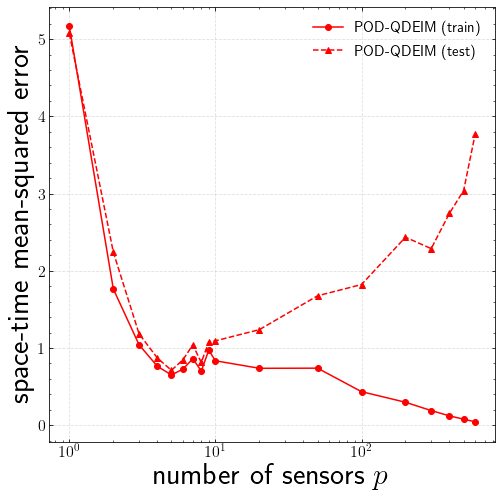

In [4]:
plt.figure(figsize=(8,8))
plt.plot(SENSOR_LIST,train_mse_pod_qdeim,'r-o',label='POD-QDEIM (train)')
plt.plot(SENSOR_LIST,test_mse_pod_qdeim,'r--^',label='POD-QDEIM (test)')

plt.xscale('log')

plt.xlabel('number of sensors $p$',size=30)
plt.ylabel('space-time mean-squared error',size=30)
plt.legend(fontsize=15,loc='best')
# fig.tight_layout()
# plt.xlim([0,950])
# plt.ylim([0,4])
plt.savefig('./png-error-trend/QDEIM_sensor_mse_sweep.png',bbox_inches='tight')

In [5]:
print('best number of sensors = ', SENSOR_LIST[np.argmin(test_mse_pod_qdeim)])

best number of sensors =  5
